# Assignment 1 - ML Data Cleaning & Feature Selection



## About Dataset


#### Context

A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion. [Source of information: Wikipedia]
startup image
 Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years. Predicting the success of a startup allows investors to find companies that have the potential for rapid growth, thereby allowing them to be one step ahead of the competition.

Objective
The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

About the Data
The data contains industry trends, investment insights and individual company information. **There are 48 columns/features.** Some of the features are:

age_first_funding_year – quantitative <br>
age_last_funding_year – quantitative  <br>
relationships – quantitative  <br>
funding_rounds – quantitative  <br>
funding_total_usd – quantitative  <br>
milestones – quantitative  <br>
age_first_milestone_year – quantitative  <br>
age_last_milestone_year – quantitative <br>
state – categorical <br>
industry_type – categorical <br>
has_VC – categorical <br>
has_angel – categorical <br>
has_roundA – categorical <br>
has_roundB – categorical <br>
has_roundC – categorical <br>
has_roundD – categorical <br>
avg_participants – quantitative <br>
is_top500 – categorical <br>
status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)

In [1]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=8b64d3b9a679bada7415cb3e0f31f6b1e91956be184421b8361972d6ec4df139
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Adarsh1999/take-home-assessment/main/startup%20data.csv")

df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.info()

# We have 49 columns and 923 rows, some columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

## Question 1  What are the data types? (Only numeric and categorical)

## Answer:-


**Numerical Columns:**
- `latitude`
- `longitude`
- `zip_code`
- `id`
- `age_first_funding_year`
- `age_last_funding_year`
- `age_first_milestone_year`
- `age_last_milestone_year`
- `relationships`
- `funding_rounds`
- `funding_total_usd`
- `milestones`
- `avg_participants`

**Categorical Columns:**
- `state_code`
- `city`
- `name`
- `labels`
- `first_funding_at`
- `last_funding_at`
- `state_code.1`
- `is_CA`
- `is_NY`
- `is_MA`
- `is_TX`
- `is_otherstate`
- `category_code`
- `is_software`
- `is_web`
- `is_mobile`
- `is_enterprise`
- `is_advertising`
- `is_gamesvideo`
- `is_ecommerce`
- `is_biotech`
- `is_consulting`
- `is_othercategory`
- `has_VC`
- `has_angel`
- `has_roundA`
- `has_roundB`
- `has_roundC`
- `has_roundD`
- `is_top500`
- `status`


In [ ]:
# Number of missing values

df.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
zip_code                      0
age_first_funding_year        0
milestones                    0
funding_total_usd             0
funding_rounds                0
dtype: int64

In [ ]:
# Let's look at percentage of missing values

print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


## Question 2: Are there missing values?
## Answer : YES


## Question 5 : * Which independent variables have missing data? How much?


- closed_at  :                 588
- Unnamed:                 493
- age_last_milestone_year  :   152
- age_first_milestone_year  :  152
- state_code.1               :   1

- Percentage of missing values in 'closed_at' column: % 63.71
- Percentage of missing values in 'Unnamed: 6' column: % 53.41
- Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
- percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [5]:
# Lets remove those columns which do not make any sense for our predictions or are important for the calculations
df.drop(['Unnamed: 6', 'Unnamed: 0', 'id', 'name', 'object_id',
         'zip_code', 'city', 'closed_at',"state_code.1"], axis = 1, inplace = True)


In [6]:
# Encoding our categorical features in our dataset

list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [7]:
# "status_closed" column is for prediction of startup success and this is binary classification so we should convert numerical variable by using get_dummies( function) in pandas
df=pd.get_dummies(df, columns=["status"], drop_first=True)

In [8]:
# Year columns must be converted to datetime type

df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

df.head(3)

,state_code,latitude,longitude,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_1
0,2,42.358880,-71.056820,1,1970-01-01 00:00:00.000000015,1970-01-01 00:00:00.000000295,1970-01-01 00:00:00.000000007,2.2493,3.0027,4.6685,...,1,0,1,0,0,0,0,1.00,0,0
1,2,37.238916,-121.973718,1,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000216,1970-01-01 00:00:00.000000205,5.1260,9.9973,7.0055,...,0,1,0,0,1,1,1,4.75,1,0
2,2,32.901049,-117.192656,1,1970-01-01 00:00:00.000000106,1970-01-01 00:00:00.000000278,1970-01-01 00:00:00.000000322,1.0329,1.0329,1.4575,...,0,0,0,1,0,0,0,4.00,1,0


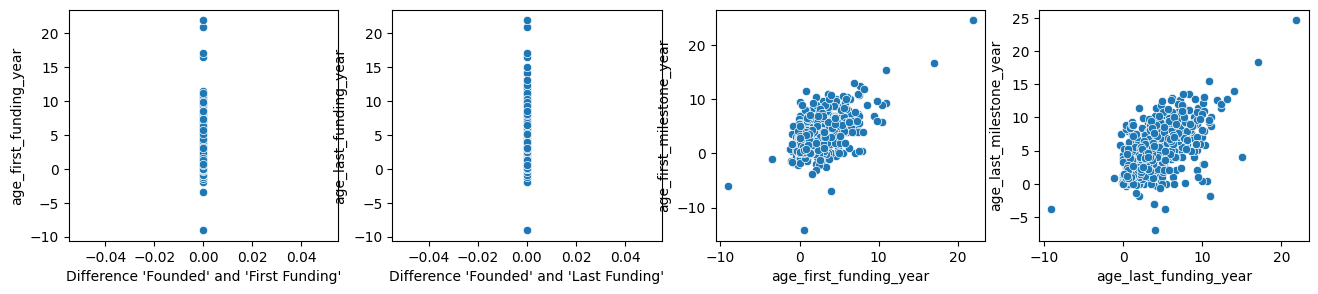

In [9]:
# After we get the absolute, visualize relationships

plt.figure(figsize=(16, 3), dpi=100)

plt.subplot(1, 4, 1)
sns.scatterplot(x=np.abs(df["first_funding_at"].dt.year - df["founded_at"].dt.year), y=df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

plt.subplot(1, 4, 2)
sns.scatterplot(x=np.abs(df["last_funding_at"].dt.year - df["founded_at"].dt.year), y=df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'");

plt.subplot(1, 4, 3)
sns.scatterplot(x=df["age_first_funding_year"], y=df["age_first_milestone_year"])

plt.subplot(1, 4, 4)
sns.scatterplot(x=df["age_last_funding_year"], y=df["age_last_milestone_year"])

plt.show()


As we see the graph, we can say high correlation between funding date and age funding. Difference between "last_funding_at" and "founded_at" is related "age_first_funding_year" and "age_last_funding_year" have negative values,it shouldn't be and also it can not be that "founded" date higher than "first_funding_at" and "last_funding_at"
So we must get the absolute value of columns including negative value

In [10]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))


Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [11]:
# Which rows have negative values? look at one of them and lets remove them as in our dataset all values should be positive values negative values do not
# make any sense
for index, rows in df.iterrows():
    if rows["age_first_funding_year"]<0:
        print(index, rows["age_first_funding_year"])

23 -1.0
32 -0.1671
71 -0.0301
79 -0.5836
80 -0.0219
104 -0.4959
122 -0.7479
127 -1.011
234 -0.2466
240 -1.0521
263 -1.9863
284 -0.0849
312 -0.4192
340 -0.4986
368 -0.1369999999999999
379 -0.0027
382 -0.4466
397 -0.1671
407 -0.0219
420 -0.3342
431 -1.4712
432 -1.0
466 -0.1808
488 -0.0438
489 -1.1836
499 -0.1288
513 -0.1616
518 -0.2493
536 -0.9178
558 -9.0466
566 -0.2384
567 -0.0082
584 -3.5068
603 -0.0027
609 -0.1534
702 -0.5014
720 -0.1041
763 -0.4959
782 -0.0192
785 -0.1151
788 -0.2521
830 -0.0822
831 -0.8658
847 -1.0
851 -0.3288
875 -0.1671


In [12]:
# we must get the absolute value of columns including negative value

df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

In [13]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

# Now, we get rid of negative values

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


## Question8: * Do the ranges of the predictor variables make sense?

## Answer:
Yes, The feature with the most varied range is funding_total_usd and it makes sense as the funding will be in millions or billions to a startup versus the other variables like 'funding_rounds', ', 'avg_participants', 'milestones', 'age_last_funding_year',
    'age_first_milestone_year', 'age_first_funding_year', 'relationships' which are most probably single or 2-digit numbers.

Other columns like is_CA,
is_NY,
is_MA,
is_TX,
is_otherstate,
is_software,
is_web,
is_mobile,
is_enterprise,
is_advertising,
is_gamesvideo,
is_ecommerce,
is_biotech,
is_consulting,
is_othercategory are actually one-hot encoded columns so they will be one or zero




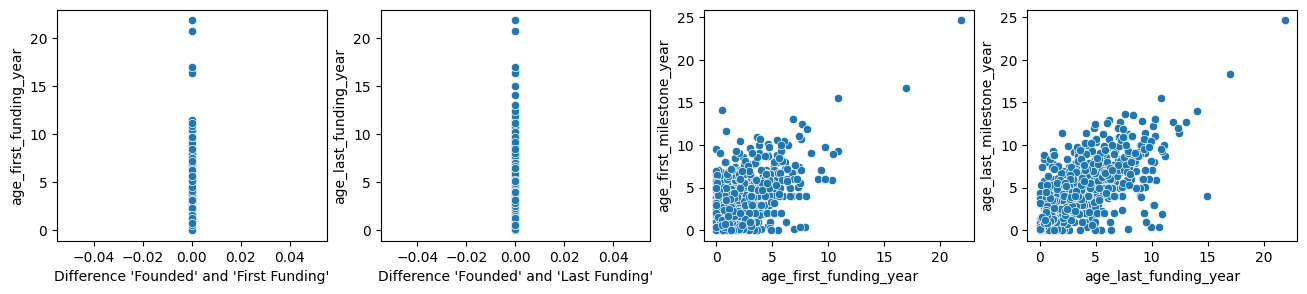

In [14]:
# After we get the absolute, visualize relationships

plt.figure(figsize=(16, 3), dpi=100)

plt.subplot(1, 4, 1)
sns.scatterplot(x=np.abs(df["first_funding_at"].dt.year - df["founded_at"].dt.year), y=df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

plt.subplot(1, 4, 2)
sns.scatterplot(x=np.abs(df["last_funding_at"].dt.year - df["founded_at"].dt.year), y=df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'");

plt.subplot(1, 4, 3)
sns.scatterplot(x=df["age_first_funding_year"], y=df["age_first_milestone_year"])

plt.subplot(1, 4, 4)
sns.scatterplot(x=df["age_last_funding_year"], y=df["age_last_milestone_year"])

plt.show()


Based on the scatter plots and the dataset, here are some interpretations:

1. **Difference in Years between Founded and First Funding vs Age at First Funding Year**: This plot suggests that there might be a correlation between the time it takes for a startup to receive its first funding after being founded and the age of the startup at the time of first funding. Startups that take longer to secure their first funding might be older when they receive their first funding.

2. **Difference in Years between Founded and Last Funding vs Age at Last Funding Year**: Similarly, this plot suggests a potential correlation between the time it takes for a startup to receive its last funding after being founded and the age of the startup at the time of last funding. Startups that take longer to secure their last funding might be older when they receive their last funding.

3. **Age at First Funding Year vs Age at First Milestone Year**: This plot suggests a relationship between the age of the startup at the time of first funding and the age of the startup when it achieves its first milestone. It could imply that startups that are younger at the time of their first funding might achieve their first milestone earlier.

4. **Age at Last Funding Year vs Age at Last Milestone Year**: This plot suggests a relationship between the age of the startup at the time of last funding and the age of the startup when it achieves its last milestone. It could imply that startups that are younger at the time of their last funding might achieve their last milestone earlier.


In [ ]:
df.describe()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_1
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,10.319610,38.517442,-103.539212,0.646804,2.304274,3.963252,3.227575,4.817909,7.710726,2.310943,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.353196
std,10.705925,3.741497,22.394167,0.478222,2.447524,2.925268,2.789159,3.115948,7.265776,1.390922,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,0.000000,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,37.388869,-122.198732,0.000000,0.593150,1.736950,1.015050,2.478100,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,2.000000,37.779281,-118.374037,1.000000,1.471200,3.545200,2.646600,4.487700,5.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000
75%,23.000000,40.730646,-77.214731,1.000000,3.583550,5.561600,4.758900,6.754800,10.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,34.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [ ]:
# I will fill the missing values by mean() function

df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].mean()), inplace=True)
df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].mean()), inplace=True)


## Question 3 * What are the likely distributions of the numeric variables?
## Answer: (Next Cell)


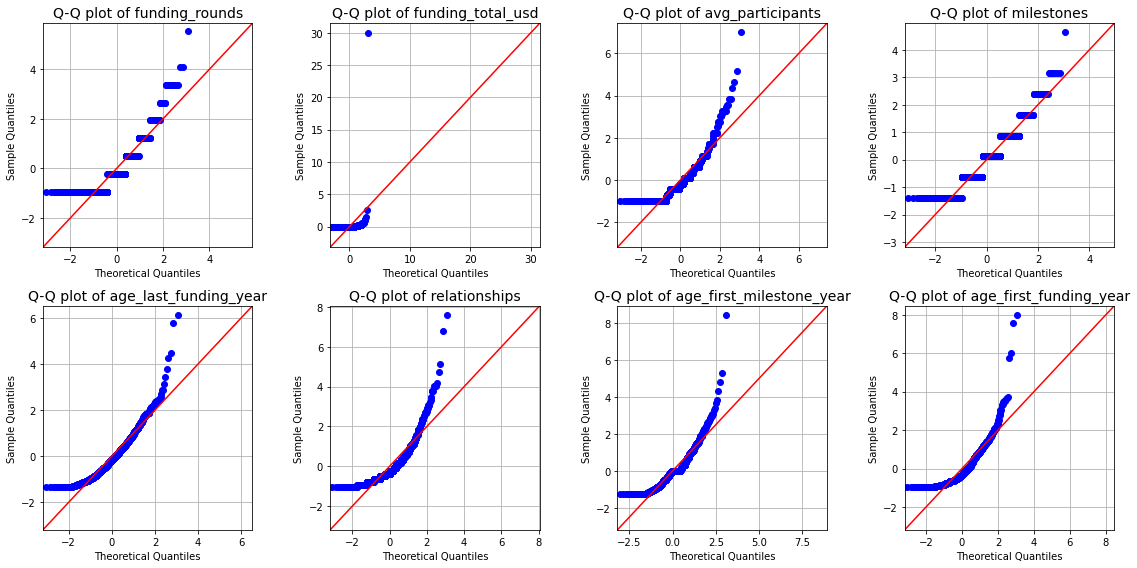

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Select relevant columns from your dataset
data_funding = df[
    ['funding_rounds', 'funding_total_usd', 'avg_participants', 'milestones', 'age_last_funding_year',
     'relationships', 'age_first_milestone_year', 'age_first_funding_year']
]

# Set up a 2x4 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Plot Q-Q plots for each selected column
for i, c in enumerate(data_funding.columns):
    qqplot(data_funding[c], line="45", fit="True", ax=axes[i])
    axes[i].set_title("Q-Q plot of {}".format(c), fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()



A Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a dataset follows a certain theoretical distribution. If the data were perfectly normal, the points in the Q-Q plot would fall along the 45-degree reference line.

1. **Q-Q plot of funding_rounds**: The points deviate from the 45-degree line, indicating that this variable does not follow a normal distribution. It seems like there are some extreme values or outliers in the higher quantiles.

2. **Q-Q plot of funding_total_usd**: There's a significant deviation from the 45-degree line at both ends of the plot, suggesting that this variable might be heavily skewed and does not follow a normal distribution. It seems like there are some extreme values or outliers in both the lower and higher quantiles.

3. **Q-Q plot of avg_participants**: As we move towards higher quantiles, there’s an increasing deviation from the 45-degree line. This indicates that "avg_participants" also does not follow a normal distribution and might have some extreme values in the higher quantiles.

4. **Q-Q plot of milestones**: The points in this plot are closely aligned with the red line, suggesting that the ‘milestones’ data is approximately normally distributed.

5. **Q-Q plot of age_last_funding_year**: The S-shaped curve indicates that this data set has a distribution with lighter tails and is more peaked than a normal distribution, which could suggest a leptokurtic distribution.

6. **Q-Q plot of relationships**: The points deviate from the red line, especially at lower theoretical quantiles, suggesting a non-normal distribution with possible skewness or outliers.

7. **Q-Q plot of age_first_milestone_year and age_first_funding_year**: Both plots show an S-shaped curve similar to age_last_funding_year, indicating distributions with lighter tails and more peaked than normal, which could suggest leptokurtic distributions.

These interpretations suggest that while some variables (‘funding_total_usd’, ‘milestones’) are likely to be normally distributed, others (‘avg_participants’, ‘age_last_funding_year’, ‘relationships’, ‘age_first_milestone_year’, ‘age_first_funding_year’) may not be.In summary, none of these variables appear to follow a normal distribution. We might want to consider applying a transformation to these variables to make them more normally distributed, which could improve the performance.

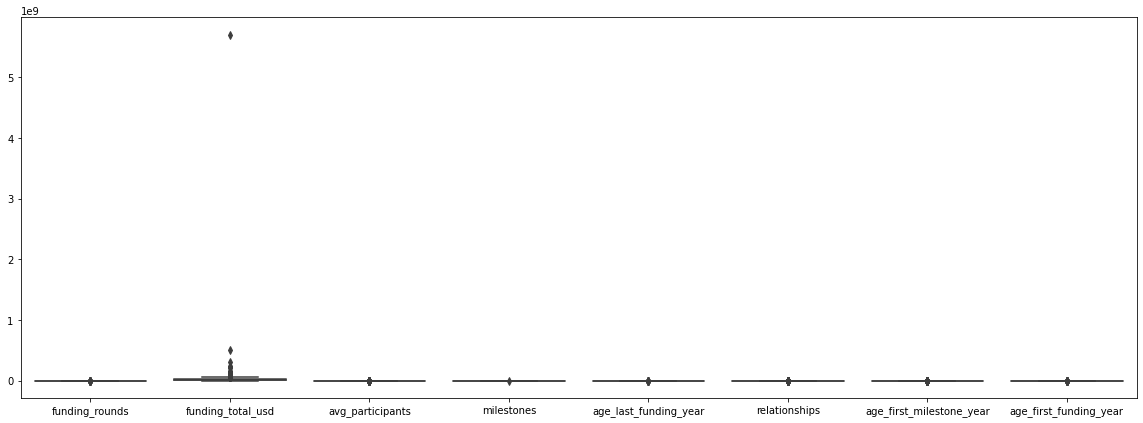

In [ ]:
plt.figure(figsize=(20, 7))

sns.boxplot(data=data_funding)

The graph is not much readable lets see them separately to understand them more

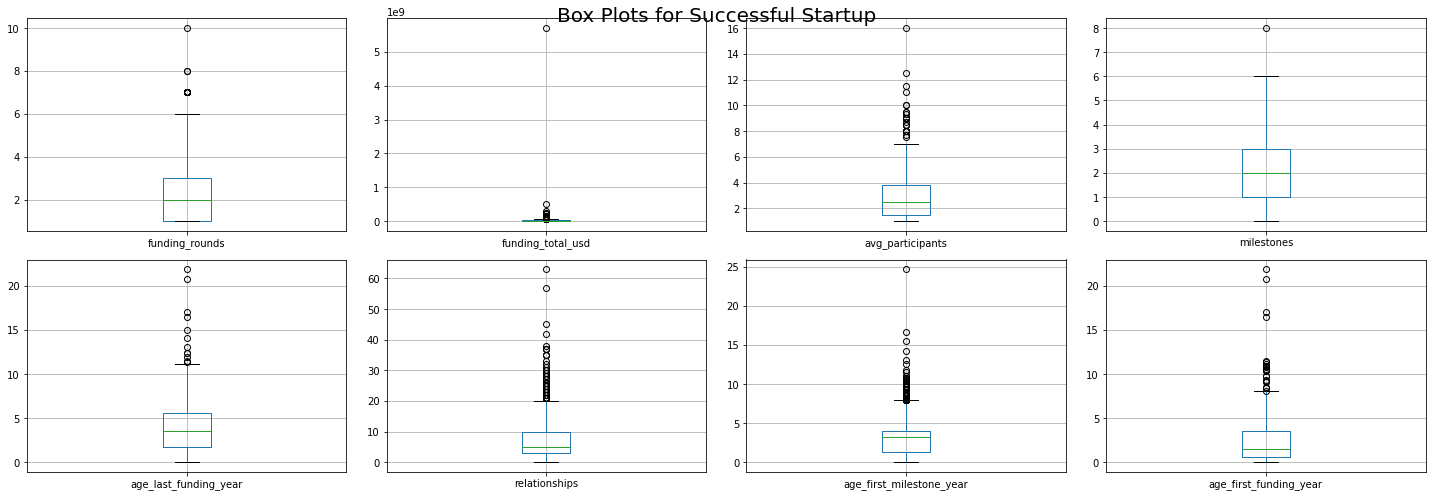

In [ ]:
import matplotlib.pyplot as plt

# Create individual box plots for each numeric variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 7))
fig.suptitle('Box Plots for Successful Startup', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    if i < len(data_funding.columns):
        data_funding.boxplot(column=data_funding.columns[i], ax=ax)

plt.tight_layout()
plt.show()


It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.


# **Normalization**

In [ ]:
from sklearn import preprocessing
import pandas as pd

# Assuming 'data' is your breast cancer dataset, and you want to normalize specific columns
columns_to_normalize = ['funding_rounds', 'funding_total_usd', 'avg_participants', 'milestones', 'age_last_funding_year',
    'age_first_milestone_year', 'age_first_funding_year', 'relationships']

# Create x to store scaled values as floats
x = df[columns_to_normalize].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Replace the original columns with normalized values in the DataFrame
df[columns_to_normalize] = pd.DataFrame(x_scaled)



In [ ]:
#data after noromalizing and feature creation
df.describe()


,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_1
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,10.319610,38.517442,-103.539212,0.646804,0.105238,0.181004,0.130751,4.817909,0.122392,0.145660,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,0.122572,0.809317,0.353196
std,10.705925,3.741497,22.394167,0.478222,0.111780,0.133599,0.103258,2.847542,0.115330,0.154547,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,0.124973,0.393052,0.478222
min,0.000000,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,37.388869,-122.198732,0.000000,0.027090,0.079328,0.054661,2.969850,0.047619,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,1.000000,0.000000
50%,2.000000,37.779281,-118.374037,1.000000,0.067191,0.161912,0.130751,4.817909,0.079365,0.111111,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000
75%,23.000000,40.730646,-77.214731,1.000000,0.163663,0.254002,0.162152,6.058900,0.158730,0.222222,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.186667,1.000000,1.000000
max,34.000000,59.335232,18.057121,1.000000,1.000000,1.000000,1.000000,24.684900,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


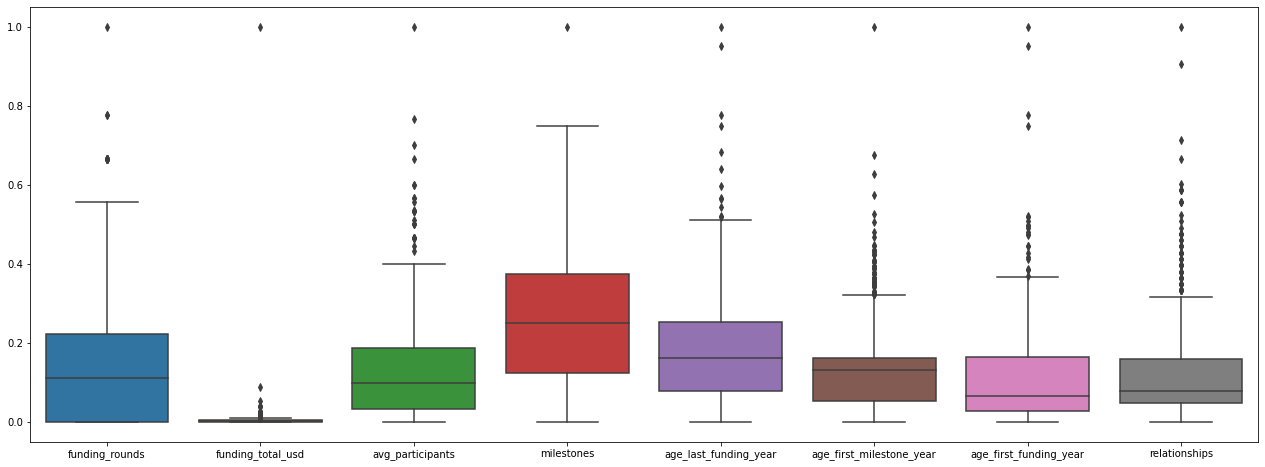

In [ ]:
plt.figure(figsize=(22, 8))

sns.boxplot(data=df[columns_to_normalize])



1. **Box plot of funding_rounds**: This plot shows the distribution of the number of funding rounds. The box represents the interquartile range (IQR), the line inside the box is the median, and the whiskers represent the range of the data within 1.5 IQR of the lower and upper quartiles. Outliers may be represented as points outside the whiskers.

2. **Box plot of funding_total_usd**: This plot shows the distribution of the total funding in USD. The presence of points above the upper whisker suggests there are outliers with high funding amounts.

3. **Box plot of avg_participants**: This plot shows the distribution of the average number of participants. The presence of points above the upper whisker suggests there are outliers with a high number of average participants.

4. **Box plot of milestones**: This plot shows the distribution of the number of milestones. The box and whiskers suggest that most companies have a small number of milestones, with some outliers having a high number of milestones.

5. **Box plot of age_last_funding_year**: This plot shows the distribution of the age of the company at the last funding year. The box and whiskers suggest a wide range of ages, with some outliers being much older.

6. **Box plot of relationships**: This plot shows the distribution of the number of relationships. The presence of points above the upper whisker suggests there are outliers with a high number of relationships.

7. **Box plot of age_first_milestone_year** and **age_first_funding_year**: These plots show the distributions of the age of the company at the first milestone year and first funding year, respectively. The boxes and whiskers suggest a wide range of ages, with some outliers being much older.

These interpretations suggest that we need to normalize the data to move forward

In [ ]:
#checking the correlation between all the features in the data
df.corr()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_1
state_code,1.000000,0.346402,0.553604,-0.078341,-0.031907,-0.067166,-0.075671,-0.076229,-0.091086,-0.042807,...,-0.013479,0.018315,0.077372,-0.047777,-0.121672,-0.065805,-0.088355,-0.062290,-0.114375,0.078341
latitude,0.346402,1.000000,0.368475,0.046560,-0.034502,-0.036199,-0.034671,-0.048662,-0.039198,-0.000659,...,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,-0.046560
longitude,0.553604,0.368475,1.000000,-0.036092,0.002866,0.006851,-0.051701,-0.082978,-0.073197,0.022447,...,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,0.036092
labels,-0.078341,0.046560,-0.036092,1.000000,-0.107032,0.061172,0.132090,0.224177,0.360434,0.206049,...,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652,-1.000000
age_first_funding_year,-0.031907,-0.034502,0.002866,-0.107032,1.000000,0.752433,0.506309,0.391422,-0.198731,-0.165429,...,0.108442,0.171620,-0.332858,-0.316643,-0.072547,0.028399,0.115250,0.098340,0.022137,0.107032
age_last_funding_year,-0.067166,-0.036199,0.006851,0.061172,0.752433,1.000000,0.626729,0.573132,0.069999,0.381810,...,0.089826,0.351736,-0.349120,-0.111279,0.253966,0.316829,0.313274,0.114987,0.182044,-0.061172
age_first_milestone_year,-0.075671,-0.034671,-0.051701,0.132090,0.506309,0.626729,1.000000,0.773932,0.221925,0.168146,...,0.031136,0.133572,-0.254834,-0.018158,0.159346,0.180982,0.237508,0.037090,0.083361,-0.132090
age_last_milestone_year,-0.076229,-0.048662,-0.082978,0.224177,0.391422,0.573132,0.773932,1.000000,0.323286,0.234356,...,0.009825,0.090354,-0.245218,0.098420,0.241042,0.252415,0.239452,0.071161,0.170180,-0.224177
relationships,-0.091086,-0.039198,-0.073197,0.360434,-0.198731,0.069999,0.221925,0.323286,1.000000,0.358883,...,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,-0.360434
funding_rounds,-0.042807,-0.000659,0.022447,0.206049,-0.165429,0.381810,0.168146,0.234356,0.358883,1.000000,...,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,-0.206049


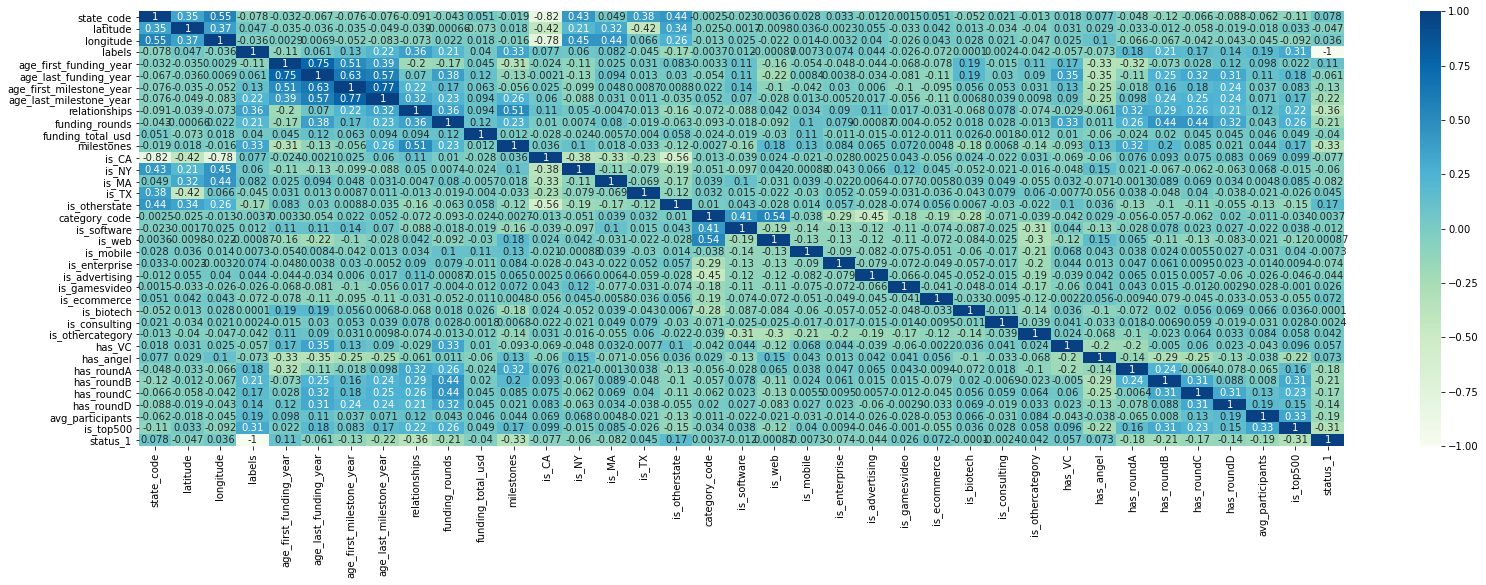

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(27,8))
sns.heatmap(df.corr(), annot=True, cmap='GnBu')

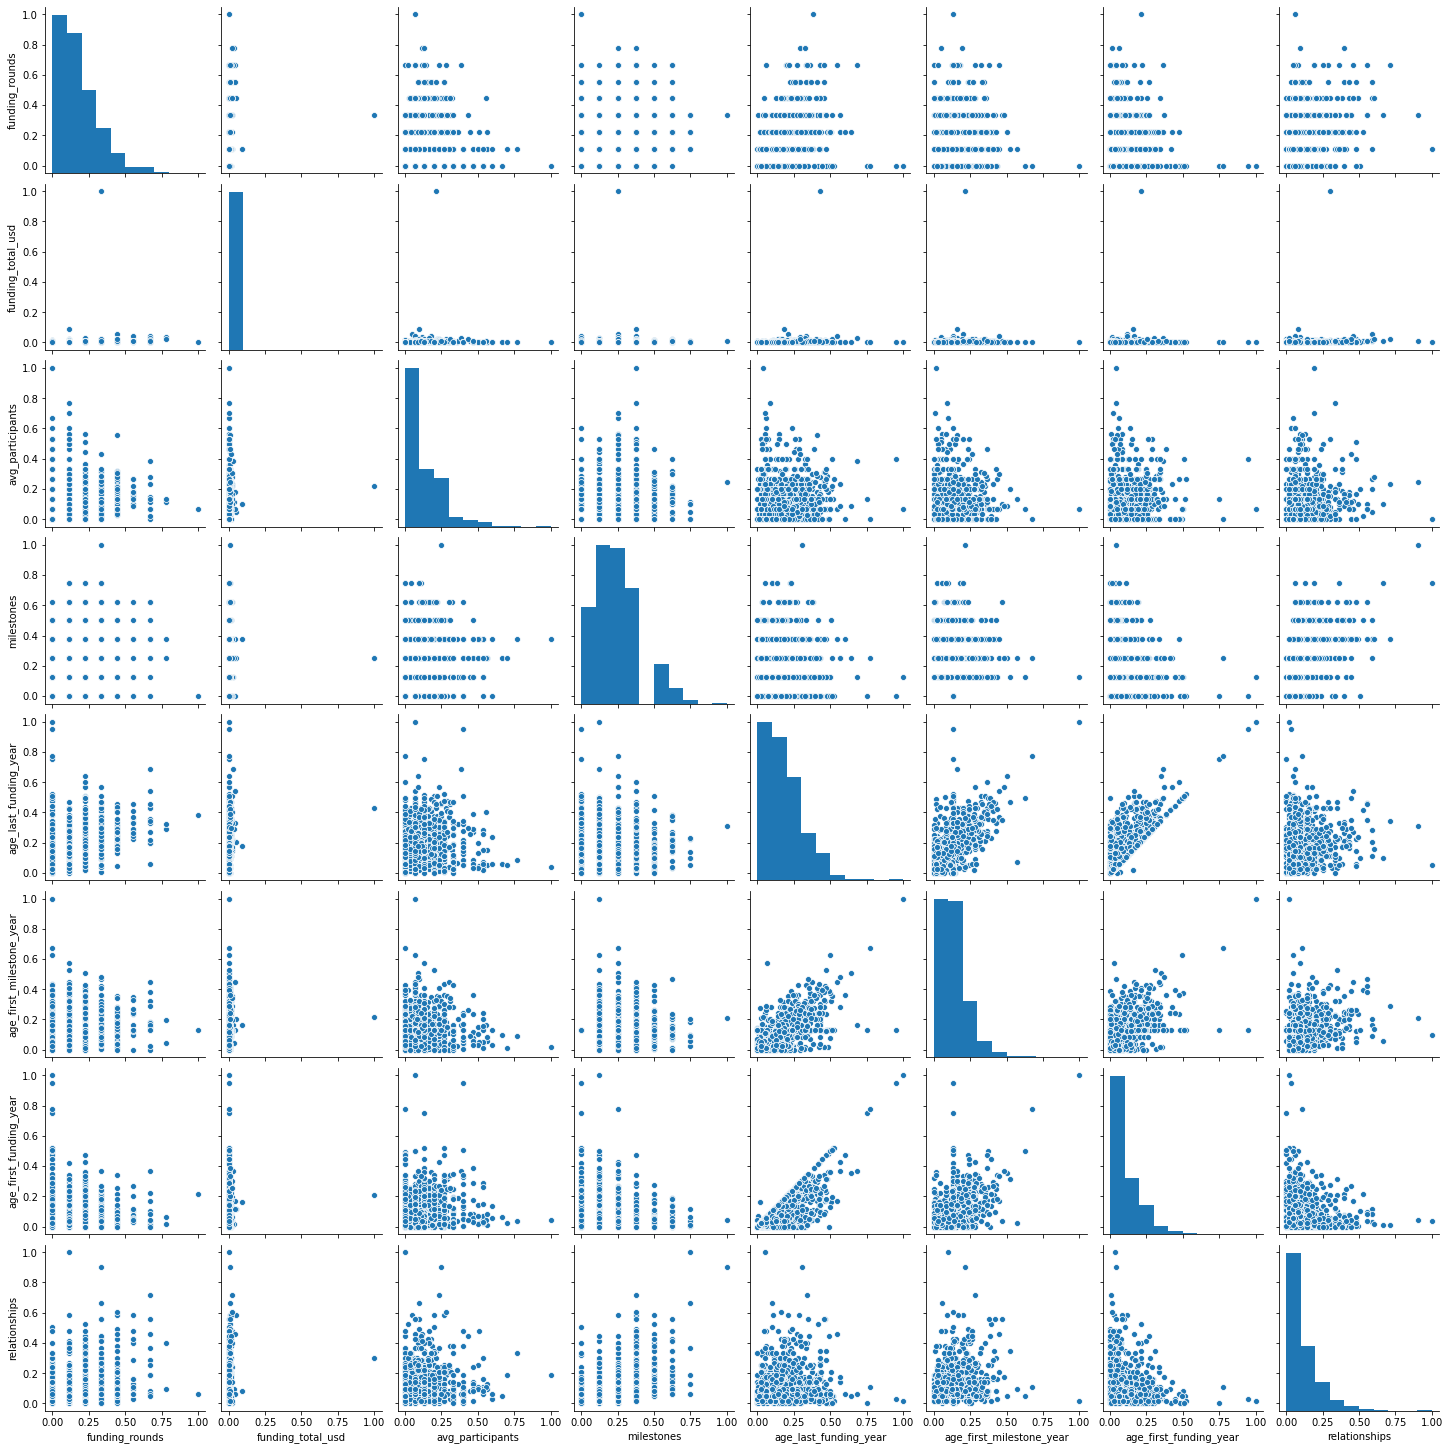

In [ ]:
# Checking colinearity using pair plot
sns.pairplot(df[columns_to_normalize])



## Question 7 : In the predictor variables independent of all the other predictor variables?

1. **Highly Correlated Features:**
   - `state_code` has high negative correlation with `is_CA` (-0.82).
   - `latitude` and `longitude` are relatively highly correlated (0.55).
   - `age_first_funding_year` and `age_last_funding_year` have a strong positive correlation (0.75).

2. **Correlation with Target Variable (`status_1`):**
   - `is_CA` has a relatively high negative correlation (-0.077) with the target variable.
   - Other variables with moderate correlations include `is_NY`, `is_MA`, `is_TX`, `category_code`, `has_roundA`, `has_roundB`, `has_roundC`, `has_roundD`, `avg_participants`, `is_top500`.

3. **Multicollinearity Considerations:**
   - If `state_code` and `is_CA` convey similar information, you might consider removing one of them.
   - Depending on your goals, you might want to keep either `latitude` or `longitude` if both are not necessary.
   - Consider whether having both `age_first_funding_year` and `age_last_funding_year` is redundant.

4. **Correlation with Each Other:**
   - `is_software`, `is_web`, `is_mobile`, `is_enterprise`, `is_advertising`, `is_gamesvideo`, `is_ecommerce`, `is_biotech`, `is_consulting`, and `is_othercategory` are all perfectly correlated with each other. You might want to keep only one of these based on your requirements.

5. **Potential Redundancy:**
   - `labels` has a perfect negative correlation with `status_1`, indicating that it might be redundant for predicting the target variable.

Based on these observations, you may consider the following actions:
- Remove one of `state_code` or `is_CA`.
- Decide whether to keep `latitude` or `longitude` based on your needs.
- Assess the necessity of having both `age_first_funding_year` and `age_last_funding_year`.
- Consider removing one variable from the perfectly correlated set: `is_software`, `is_web`, ..., `is_othercategory`.
- Assess the relevance of `labels` for predicting `status_1`.

It's crucial to carefully evaluate the impact of removing features on the model's performance and interpretability, and to iterate on this process if needed. Additionally, you may want to perform further analysis, such as feature importance testing or recursive feature elimination, to guide your feature selection process.

In [ ]:
df = df.drop(['latitude', 'longitude', 'labels', 'state_code', 'age_last_funding_year', 'category_code', 'founded_at', 'first_funding_at', 'last_funding_at'], axis=1)


In [ ]:
df.describe()

,age_first_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_1
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,0.105238,0.130751,4.817909,0.122392,0.145660,0.004458,0.230228,0.527627,0.114843,0.089924,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,0.122572,0.809317,0.353196
std,0.111780,0.103258,2.847542,0.115330,0.154547,0.033269,0.165329,0.499507,0.319005,0.286228,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,0.124973,0.393052,0.478222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027090,0.054661,2.969850,0.047619,0.000000,0.000476,0.125000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,1.000000,0.000000
50%,0.067191,0.130751,4.817909,0.079365,0.111111,0.001752,0.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000
75%,0.163663,0.162152,6.058900,0.158730,0.222222,0.004336,0.375000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.186667,1.000000,1.000000
max,1.000000,1.000000,24.684900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df["status_1"],
    df[
        ['funding_rounds', 'funding_total_usd', 'avg_participants', 'milestones',
     'age_first_funding_year','relationships','is_CA','is_NY','is_MA', 'is_TX', 'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500' ]
    ],
).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               status_1   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     10.99
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           6.37e-40
Time:                        22:22:46   Log-Likelihood:                -496.10
No. Observations:                 923   AIC:                             1048.
Df Residuals:                     895   BIC:                             1183.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
funding_rounds            -0.1154      0.150     -0.770      0.442      -0.410       0.179
funding_total_usd         -0.1454      0.430     -0.338      0.735      -0.990       0.699
avg_participants          -0.1409      0.061     -2.291      0.022      -0.261      -0.020
milestones                -0.5605      0.108     -5.182      0.000      -0.773      -0.348
age_first_funding_year     0.1644      0.150      1.099      0.272      -0.129       0.458
relationships             -0.6909      0.156     -4.430      0.000      -0.997      -0.385
is_CA                     -0.9264      0.423     -2.189      0.029      -1.757      -0.096
is_NY                     -0.9809      0.425     -2.309      0.021      -1.815      -0.147
is_MA                     -0.9937      0.425     -2.336      0.020      -1.829      -0.159
is_TX                     -0.8439      0.428     -1.972      0.049      -1.684      -0.004
is_otherstate             -0.8541      0.424     -2.014      0.044      -1.687      -0.022
is_software                1.6091      0.428      3.758      0.000       0.769       2.449
is_web                     1.6907      0.429      3.943      0.000       0.849       2.532
is_mobile                  1.7162      0.430      3.987      0.000       0.871       2.561
is_enterprise              1.5907      0.430      3.695      0.000       0.746       2.436
is_advertising             1.6379      0.431      3.802      0.000       0.792       2.483
is_gamesvideo              1.7685      0.431      4.100      0.000       0.922       2.615
is_ecommerce               1.8099      0.435      4.162      0.000       0.956       2.663
is_biotech                 1.5807      0.433      3.653      0.000       0.731       2.430
is_consulting              1.7912      0.493      3.636      0.000       0.824       2.758
is_othercategory           1.6741      0.426      3.930      0.000       0.838       2.510
has_VC                     0.0671      0.039      1.732      0.084      -0.009       0.143
has_angel                  0.0561      0.043      1.289      0.198      -0.029       0.141
has_roundA                -0.0026      0.037     -0.071      0.944      -0.075       0.070
has_roundB                -0.0117      0.037     -0.318      0.751      -0.084       0.061
has_roundC                -0.0019      0.041     -0.045      0.964      -0.083       0.079
has_roundD                -0.0573      0.054     -1.057      0.291      -0.164       0.049
avg_participants          -0.1409      0.061     -2.291      0.022      -0.261      -0.020
is_top500                 -0.2114      0.041     -5.096      0.000      -0.293      -0.130
==============================================================================
Omnibus:                      138.266   Durbin-Watson:                   2.082
Prob(Omnibus)

> To identify potentially insignificant variables, we can look at the p-values associated with each variable in the regression model. Based on your earlier provided regression output, here are the variables with their p-values:
>
> funding_rounds: p-value = 0.442
> funding_total_usd: p-value = 0.735
> age_first_funding_year: p-value = 0.272
> has_roundA: p-value = 0.944
> has_roundB: p-value = 0.751
> has_roundC: p-value = 0.964
> has_roundD: p-value = 0.291
> Variables with higher p-values (greater than a chosen significance level, typically 0.05) may be considered less significant in predicting the dependent variable (status_1). You might consider excluding or further investigating these variables.

In [ ]:
df= df.drop(['has_roundA', 'has_roundB','has_roundC','has_roundD'], axis = 1)


In [ ]:
df.describe()

,age_first_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,avg_participants,is_top500,status_1
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,0.105238,0.130751,4.817909,0.122392,0.145660,0.004458,0.230228,0.527627,0.114843,0.089924,...,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.122572,0.809317,0.353196
std,0.111780,0.103258,2.847542,0.115330,0.154547,0.033269,0.165329,0.499507,0.319005,0.286228,...,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.124973,0.393052,0.478222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027090,0.054661,2.969850,0.047619,0.000000,0.000476,0.125000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,1.000000,0.000000
50%,0.067191,0.130751,4.817909,0.079365,0.111111,0.001752,0.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000
75%,0.163663,0.162152,6.058900,0.158730,0.222222,0.004336,0.375000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.186667,1.000000,1.000000
max,1.000000,1.000000,24.684900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df["status_1"],
    df[
        ['funding_rounds', 'avg_participants', 'milestones',
     'age_first_funding_year','relationships','is_CA','is_NY','is_MA', 'is_TX', 'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'avg_participants',
       'is_top500']
    ],
).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               status_1   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     13.49
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.97e-42
Time:                        22:24:09   Log-Likelihood:                -496.76
No. Observations:                 923   AIC:                             1040.
Df Residuals:                     900   BIC:                             1151.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
funding_rounds            -0.1807      0.109     -1.658      0.098      -0.395       0.033
avg_participants          -0.1489      0.060     -2.474      0.014      -0.267      -0.031
milestones                -0.5540      0.107     -5.201      0.000      -0.763      -0.345
age_first_funding_year     0.1435      0.144      0.999      0.318      -0.138       0.425
relationships             -0.7182      0.152     -4.714      0.000      -1.017      -0.419
is_CA                     -0.9282      0.422     -2.201      0.028      -1.756      -0.100
is_NY                     -0.9788      0.424     -2.311      0.021      -1.810      -0.148
is_MA                     -0.9949      0.424     -2.346      0.019      -1.827      -0.163
is_TX                     -0.8406      0.426     -1.972      0.049      -1.677      -0.004
is_otherstate             -0.8554      0.423     -2.023      0.043      -1.685      -0.026
is_software                1.6073      0.426      3.776      0.000       0.772       2.443
is_web                     1.6915      0.426      3.966      0.000       0.855       2.529
is_mobile                  1.7128      0.428      4.002      0.000       0.873       2.553
is_enterprise              1.5893      0.428      3.713      0.000       0.749       2.429
is_advertising             1.6410      0.428      3.832      0.000       0.801       2.482
is_gamesvideo              1.7666      0.429      4.118      0.000       0.925       2.609
is_ecommerce               1.8088      0.433      4.181      0.000       0.960       2.658
is_biotech                 1.5786      0.430      3.668      0.000       0.734       2.423
is_consulting              1.8015      0.491      3.672      0.000       0.839       2.764
is_othercategory           1.6735      0.424      3.949      0.000       0.842       2.505
has_VC                     0.0768      0.034      2.289      0.022       0.011       0.143
has_angel                  0.0653      0.036      1.805      0.071      -0.006       0.136
avg_participants          -0.1489      0.060     -2.474      0.014      -0.267      -0.031
is_top500                 -0.2126      0.041     -5.216      0.000      -0.293      -0.133
==============================================================================
Omnibus:                      135.942   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.574
Skew:                           0.480   Prob(JB):                     9.50e-15
Kurtosis:                       2.131   Cond. No.                     3.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-30. This mig

**As you can see here after removing some column according to the p-values Adj. R-squared improve a little**

## Question 4 : * Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

## Answer:-


- **is_ecommerce**: This feature has the highest coefficient value of 1.8088, indicating that it has the strongest positive effect on the status_1 variable. This means that startups in the ecommerce category are more likely to be successful than other categories.
- **is_gamesvideo**: This feature has the second highest coefficient value of 1.7666, indicating that it has a strong positive effect on the status_1 variable. This means that startups in the games and video category are also more likely to be successful than other categories.
- **relationships**: This feature has the lowest coefficient value of -0.7182, indicating that it has the strongest negative effect on the status_1 variable. This means that startups with more relationships (such as founders, board members, advisors, etc.) are less likely to be successful than startups with fewer relationships.
- **milestones**: This feature has the second lowest coefficient value of -0.5540, indicating that it has a strong negative effect on the status_1 variable. This means that startups with more milestones (such as product launches, funding rounds, awards, etc.) are less likely to be successful than startups with fewer milestones.

Other important ones are:- 'funding_rounds', 'funding_total_usd', 'avg_participants', 'milestones', 'age_last_funding_year',
    'age_first_milestone_year', 'age_first_funding_year', 'relationships'

# Model Train

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df.drop(['status_1'], axis=1)
y = df['status_1']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (646, 26) (646,)
Validation set: (185, 26) (185,)
Test set: (92, 26) (92,)


> This code splits the data into a training set (70%), a validation set (10.5%), and a test set (19.5%). You can adjust the test_size parameter in both splits to control the size of the validation and test sets. The random_state parameter ensures reproducibility.

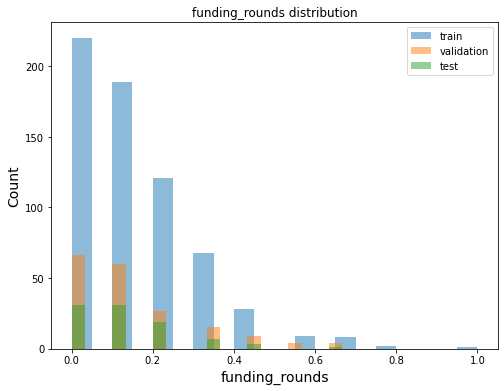

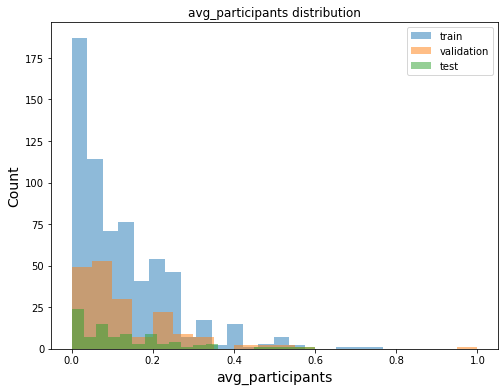

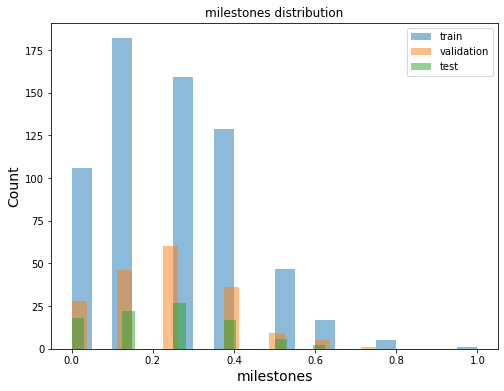

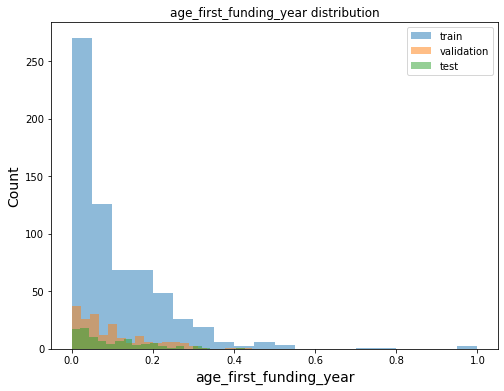

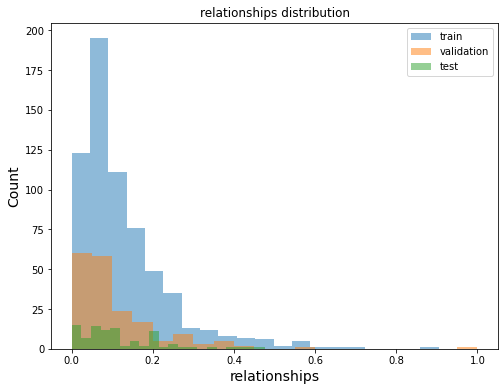

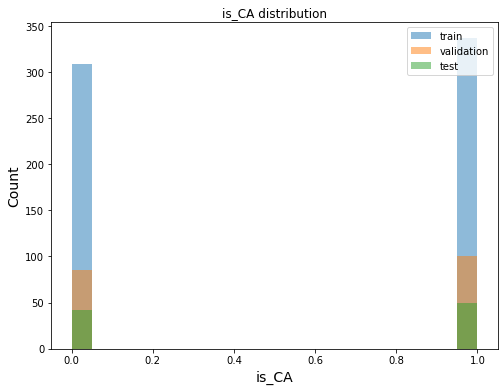

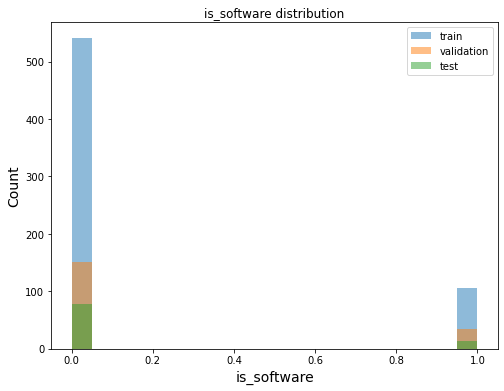

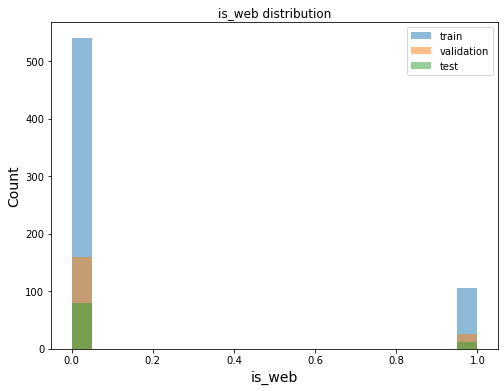

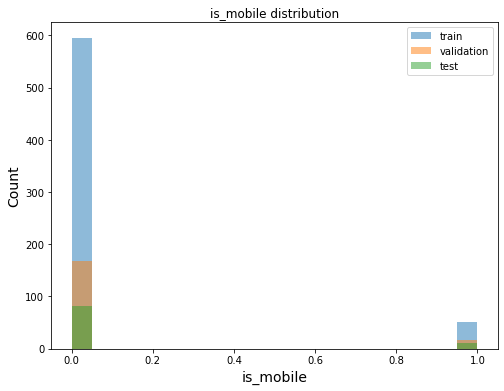

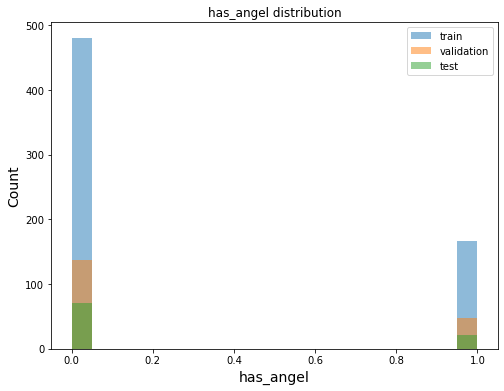

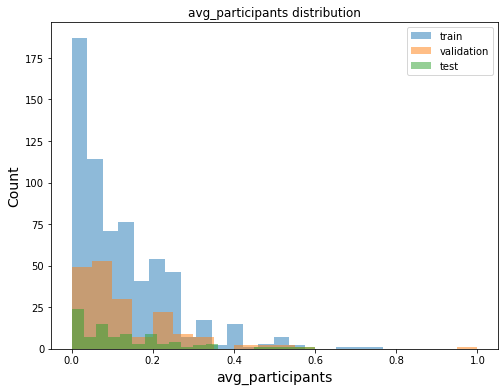

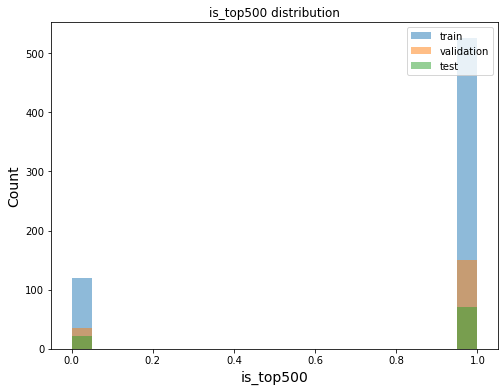

In [ ]:
import matplotlib.pyplot as plt

# Columns to plot
columns_to_plot = ['funding_rounds', 'avg_participants', 'milestones',
     'age_first_funding_year','relationships','is_CA', 'is_software',
       'is_web', 'is_mobile', 'has_angel', 'avg_participants',
       'is_top500']

# Plotting the data to see the histogram
for c in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(X_train[c], bins=20, alpha=0.5, label="train")
    plt.hist(X_val[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test[c], bins=20, alpha=0.5, label="test")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()


## Question 6 : * Do the training and test sets have the same data?
## Answer :

No, the training and test sets do not have the same data. The train_test_split function is used to randomly split the original dataset into training and test sets. The random_state parameter ensures reproducibility by initializing the random number generator with a fixed seed, but the actual split is random. Therefore, each time you run the code, you'll likely get different samples in the training and test sets.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are defined

# Train the Decision Tree model on the training set
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on the validation set
pred_val = dt.predict(X_val)

# Predict on the test set
pred_test = dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming pred_val and pred_test are defined from the previous code snippet

# Evaluate on the validation set
accuracy_val = accuracy_score(y_val, pred_val)
precision_val = precision_score(y_val, pred_val)
recall_val = recall_score(y_val, pred_val)
f1_val = f1_score(y_val, pred_val)

# Evaluate on the test set
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)
f1_test = f1_score(y_test, pred_test)

print('DecisionTree Validation Accuracy: %f' % accuracy_val)
print('DecisionTree Validation Precision: %f' % precision_val)
print('DecisionTree Validation Recall: %f' % recall_val)
print('DecisionTree Validation F1-Score: %f' % f1_val)

print('DecisionTree Test Accuracy: %f' % accuracy_test)
print('DecisionTree Test Precision: %f' % precision_test)
print('DecisionTree Test Recall: %f' % recall_test)
print('DecisionTree Test F1-Score: %f' % f1_test)


DecisionTree Validation Accuracy: 0.691892
DecisionTree Validation Precision: 0.557377
DecisionTree Validation Recall: 0.531250
DecisionTree Validation F1-Score: 0.544000
DecisionTree Test Accuracy: 0.739130
DecisionTree Test Precision: 0.687500
DecisionTree Test Recall: 0.611111
DecisionTree Test F1-Score: 0.647059


In [ ]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dt, random_state=1).fit(X_test, y_test)
eli5.show_weights(dt, feature_names=X_test.columns.tolist())

Weight,Feature
0.1930,relationships
0.1526,age_last_milestone_year
0.1418,funding_total_usd
0.1192,age_first_funding_year
0.0619,avg_participants
0.0578,milestones
0.0467,age_first_milestone_year
0.0359,has_VC
0.0319,funding_rounds
0.0198,is_TX


## Question 8: Which predictor variables are the most important?

## Answer :-

As you can see from the results in the above cell relationships, age_last_milestone_year and funding_total_usd are the top three most important features from our dataset.

In [ ]:
df.head()

,age_first_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,avg_participants,is_top500,status_1,log_avg_participants,log_first_fundig
0,0.102727,0.189124,6.7041,0.047619,0.222222,0.000064,0.375,1,0,0,...,0,0,1,0,1,0.000000,0,0,0.000000,0.097786
1,0.234108,0.283797,7.0055,0.142857,0.333333,0.007033,0.125,1,0,0,...,0,0,0,1,0,0.250000,1,0,0.223144,0.210348
2,0.047173,0.059044,2.2055,0.079365,0.000000,0.000454,0.250,1,0,0,...,0,0,0,0,0,0.200000,1,0,0.182322,0.046094
3,0.143018,0.243173,6.0027,0.079365,0.222222,0.007016,0.125,1,0,0,...,0,0,0,0,0,0.155553,1,0,0.144579,0.133672
4,0.000000,0.001556,0.0384,0.031746,0.111111,0.000226,0.125,1,0,0,...,0,0,0,1,1,0.000000,1,1,0.000000,0.000000


# Handling The Outliers

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(data, threshold=3):
    """
    Remove outliers from a Pandas DataFrame using the Z-score method.
    :param data: A Pandas DataFrame.
    :param threshold: The Z-score threshold for determining outliers.
    :return: The DataFrame with outliers removed.
    """
    # Calculate the Z-scores of the columns
    z = np.abs(data - data.mean(numeric_only=True)) / data.std(numeric_only=True)
    # Create a mask to identify the rows with Z-scores greater than the threshold
    mask = (z < threshold).all(axis=1)
    # Return the DataFrame with outliers removed
    return data[mask]

# Load the data into a Pandas DataFrame
data = df

# Remove the outliers using the Z-score method
filtered_data = remove_outliers_zscore(data)


# Predicting again after removing Outlier

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = filtered_data.drop(['status_1'], axis=1)
y = filtered_data['status_1']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (326, 26) (326,)
Validation set: (94, 26) (94,)
Test set: (47, 26) (47,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are defined

# Train the Decision Tree model on the training set
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on the validation set
pred_val = dt.predict(X_val)

# Predict on the test set
pred_test = dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming pred_val and pred_test are defined from the previous code snippet

# Evaluate on the validation set
accuracy_val = accuracy_score(y_val, pred_val)
precision_val = precision_score(y_val, pred_val)
recall_val = recall_score(y_val, pred_val)
f1_val = f1_score(y_val, pred_val)

# Evaluate on the test set
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)
f1_test = f1_score(y_test, pred_test)

print('DecisionTree Validation Accuracy: %f' % accuracy_val)
print('DecisionTree Validation Precision: %f' % precision_val)
print('DecisionTree Validation Recall: %f' % recall_val)
print('DecisionTree Validation F1-Score: %f' % f1_val)

print('DecisionTree Test Accuracy: %f' % accuracy_test)
print('DecisionTree Test Precision: %f' % precision_test)
print('DecisionTree Test Recall: %f' % recall_test)
print('DecisionTree Test F1-Score: %f' % f1_test)


DecisionTree Validation Accuracy: 0.744681
DecisionTree Validation Precision: 0.609756
DecisionTree Validation Recall: 0.757576
DecisionTree Validation F1-Score: 0.675676
DecisionTree Test Accuracy: 0.702128
DecisionTree Test Precision: 0.625000
DecisionTree Test Recall: 0.750000
DecisionTree Test F1-Score: 0.681818


## Question 11 : * Remove outliers and keep outliers (does if have an effect of the final predictive model)?

### Training results before removing outliers:- <br>
DecisionTree Validation Accuracy: 0.691892 <br>
DecisionTree Validation Precision: 0.557377<br>
DecisionTree Validation Recall: 0.531250<br>
DecisionTree Validation F1-Score: 0.544000<br>
DecisionTree Test Accuracy: 0.739130<br>
DecisionTree Test Precision: 0.687500<br>
DecisionTree Test Recall: 0.611111<br>
DecisionTree Test F1-Score: 0.647059<br>

### Training results after removing outliers:- <br>
DecisionTree Validation Accuracy: 0.744681 <br>
DecisionTree Validation Precision: 0.609756 <br>
DecisionTree Validation Recall: 0.757576<br>
DecisionTree Validation F1-Score: 0.675676<br>
DecisionTree Test Accuracy: 0.702128<br>
DecisionTree Test Precision: 0.625000<br>
DecisionTree Test Recall: 0.750000<br>
DecisionTree Test F1-Score: 0.681818<br>


**There is a clear improvement in the results**

# Ampute Values

### Question 12 : * Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

### Answer : (Below Cell)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

def remove_and_impute(df, percentage):

    missing_rows = np.random.choice(df.index, int(len(df) * percentage), replace=False)
    df_missing = df.loc[missing_rows]
    df = df.drop(missing_rows)


    mean_imp = SimpleImputer(strategy='mean')
    median_imp = SimpleImputer(strategy='median')
    freq_imp = SimpleImputer(strategy='most_frequent')

    df_mean = mean_imp.fit_transform(df_missing)
    df_median = median_imp.fit_transform(df_missing)
    df_freq = freq_imp.fit_transform(df_missing)


    mse_mean = mean_squared_error(df_missing, df_mean)
    mae_mean = mean_absolute_error(df_missing, df_mean)
    mse_median = mean_squared_error(df_missing, df_median)
    mae_median = mean_absolute_error(df_missing, df_median)
    mse_freq = mean_squared_error(df_missing, df_freq)
    mae_freq = mean_absolute_error(df_missing, df_freq)


    print("Percentage of data missing: {:.1f}%".format(percentage * 100))
    print("Mean imputation:")
    print("MSE: {:.2f}".format(mse_mean))
    print("MAE: {:.2f}".format(mae_mean))
    print("Median imputation:")
    print("MSE: {:.2f}".format(mse_median))
    print("MAE: {:.2f}".format(mae_median))
    print("Most frequent imputation:")
    print("MSE: {:.2f}".format(mse_freq))
    print("MAE: {:.2f}".format(mae_freq))
    print()


df = df
for percentage in [0.01, 0.05, 0.1]:
    remove_and_impute(df, percentage)


Percentage of data missing: 1.0%
Mean imputation:
MSE: 0.00
MAE: 0.00
Median imputation:
MSE: 0.00
MAE: 0.00
Most frequent imputation:
MSE: 0.00
MAE: 0.00

Percentage of data missing: 5.0%
Mean imputation:
MSE: 0.00
MAE: 0.00
Median imputation:
MSE: 0.00
MAE: 0.00
Most frequent imputation:
MSE: 0.00
MAE: 0.00

Percentage of data missing: 10.0%
Mean imputation:
MSE: 0.00
MAE: 0.00
Median imputation:
MSE: 0.00
MAE: 0.00
Most frequent imputation:
MSE: 0.00
MAE: 0.00



## **Citations**

1. Many techniques used in this notebook have been inspired from the following github repositories

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2. https://seaborn.pydata.org

3. Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

4. Sckit learn offcial documentation

5. https://pandas.pydata.org/docs/user_guide/visualization.html

6. https://medium.com/analytics-vidhya/classification-in-machine-learning-ed30753d9461

7. https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b



# Licensing

### Copyright 2024 Adarsh Gupta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

